In [1]:
pip install tweepy

In [2]:
pip install textblob

In [3]:
pip install pycountry

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 18.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681831 sha256=1ba60f40ce917448a5d924394bdfddfa6933fe9249cdc208994b916b5f320022
  Stored in directory: /root/.cache/pip/wheels/03/57/cc/290c5252ec97a6d78d36479a3c5e5ecc76318afcb241ad9dbe
Successfully built pycountry


In [4]:
pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993225 sha256=3e57fb1da0ac65f161dee081cc68329f1d4583a8a2ac0b293a9ff4df2fce8ffa
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [5]:
# Import Libraries
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [7]:
import tweepy
import re
import time

In [8]:
from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
uploaded = files.upload()

Saving AirlinesTweetsRealtime1.json to AirlinesTweetsRealtime1.json
Saving AirlinesTweetsRealtime2.json to AirlinesTweetsRealtime2.json
Saving AirlinesTweetsRealTime3.json to AirlinesTweetsRealTime3.json
Saving AirlinesTweetsRealtime4.json to AirlinesTweetsRealtime4.json
Saving AirlinesTweetsRealtime5.json to AirlinesTweetsRealtime5.json
Saving AirlinesTweetsRealtime6.json to AirlinesTweetsRealtime6.json
Saving AirlinesTweetsRealtime7.json to AirlinesTweetsRealtime7.json
Saving AirlinesTweetsRealtime8.json to AirlinesTweetsRealtime8.json
Saving AirlinesTweetsRealtime9.json to AirlinesTweetsRealtime9.json
Saving AirlinesTweetsRealtime10.json to AirlinesTweetsRealtime10.json
Saving AirlinesTweetsRealtime11.json to AirlinesTweetsRealtime11.json
Saving AirlinesTweetsRealtime12.json to AirlinesTweetsRealtime12.json
Saving AirlinesTweetsRealtime13.json to AirlinesTweetsRealtime13.json
Saving AirlinesTweetsRealtime14.json to AirlinesTweetsRealtime14.json
Saving AirlinesTweetsRealtime15.json t

In [10]:
# Reading the dataset
data1 = pd.read_json('AirlinesTweetsRealtime1.json', lines=True) # Read the dataset.
data2 = pd.read_json('AirlinesTweetsRealtime2.json', lines=True) # Read the dataset.
data3 = pd.read_json('AirlinesTweetsRealTime3.json', lines=True) # Read the dataset.
data4 = pd.read_json('AirlinesTweetsRealtime4.json', lines=True) # Read the dataset.
data5 = pd.read_json('AirlinesTweetsRealtime5.json', lines=True) # Read the dataset.
data6 = pd.read_json('AirlinesTweetsRealtime6.json', lines=True) # Read the dataset.
data7 = pd.read_json('AirlinesTweetsRealtime7.json', lines=True) # Read the dataset.
data8 = pd.read_json('AirlinesTweetsRealtime8.json', lines=True) # Read the dataset.
data9 = pd.read_json('AirlinesTweetsRealtime9.json', lines=True) # Read the dataset.
data10 = pd.read_json('AirlinesTweetsRealtime10.json', lines=True) # Read the dataset.
data11 = pd.read_json('AirlinesTweetsRealtime11.json', lines=True) # Read the dataset.
data12 = pd.read_json('AirlinesTweetsRealtime12.json', lines=True) # Read the dataset.
data13 = pd.read_json('AirlinesTweetsRealtime13.json', lines=True) # Read the dataset.
data14 = pd.read_json('AirlinesTweetsRealtime14.json', lines=True) # Read the dataset.
data15 = pd.read_json('AirlinesTweetsRealtime15.json', lines=True) # Read the dataset.
data16 = pd.read_json('AirlinesTweetsRealtime16.txt', lines=True) # Read the dataset.
data17 = pd.read_json('AirlinesTweetsRealtime17.json', lines=True) # Read the dataset.
data18 = pd.read_json('AirlinesTweetsRealtime18.json', lines=True) # Read the dataset.
data19 = pd.read_json('AirlinesTweetsRealtime19.json', lines=True) # Read the dataset.
data20 = pd.read_json('AirlinesTweetsRealtime20.json', lines=True) # Read the dataset.


data = pd.concat([data1,data2,data3,data4,data5, data6, data7, data8, data9, data10,data11,data12,data13,data14, data15,data16,data17, data18, data19, data20 ], ignore_index=True)

In [11]:
df = data.copy()

In [12]:
df

,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,...,quoted_status_id_str,retweet_count,favorite_count,favorited,retweeted,lang,possibly_sensitive,extended_entities,quoted_status,withheld_in_countries
0,2023-06-24 05:43:22+00:00,1672480513741713408,1672480513741713408,RT @MakisMD: American Airlines Flight Attendan...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,1.671684e+18,165,0,False,False,en,NaN,NaN,NaN,NaN
1,2023-06-24 05:43:12+00:00,1672480471866023938,1672480471866023936,@joiedevivre789 Transit travels are better thr...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.672480e+18,1.672480e+18,...,NaN,0,0,False,False,en,NaN,NaN,NaN,NaN
2,2023-06-24 05:43:07+00:00,1672480451582124034,1672480451582124032,Aeromexico Flight Change policy\n\nIf you want...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,NaN,0,0,False,False,en,0.0,NaN,NaN,NaN
3,2023-06-24 05:42:56+00:00,1672480403553411073,1672480403553411072,United Airlines flight #UAL1597 spotted at 775...,False,"{'hashtags': [{'text': 'UAL1597', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://null.kiwi.net/"" rel=""nofollow""...",NaN,NaN,...,NaN,0,0,False,False,en,0.0,NaN,NaN,NaN
4,2023-06-24 05:42:26+00:00,1672480280580603904,1672480280580603904,"United Airlines flight #UAL1813 spotted at 29,...",False,"{'hashtags': [{'text': 'UAL1813', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://null.kiwi.net/"" rel=""nofollow""...",NaN,NaN,...,NaN,0,0,False,False,en,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10718,2023-07-12 00:49:32+00:00,1678929548677619712,1678929548677619712,RT @OnDisasters: #Ongoing a Halla Airlines EMB...,False,"{'hashtags': [{'text': 'Ongoing', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,NaN,804,0,False,False,en,NaN,NaN,NaN,NaN
10719,2023-07-12 00:49:27+00:00,1678929529832878081,1678929529832878080,Southwest Airlines flight #SWA818 spotted at 1...,False,"{'hashtags': [{'text': 'SWA818', 'indices': [2...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://null.kiwi.net/"" rel=""nofollow""...",NaN,NaN,...,NaN,0,0,False,False,en,0.0,NaN,NaN,NaN
10720,2023-07-12 00:49:24+00:00,1678929516511604737,1678929516511604736,RT @OnDisasters: #Ongoing a Halla Airlines EMB...,False,"{'hashtags': [{'text': 'Ongoing', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,NaN,804,0,False,False,en,NaN,NaN,NaN,NaN
10721,2023-07-12 00:49:21+00:00,1678929505849602053,1678929505849602048,RT @Mikedknight: This woman deserves to be nat...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,NaN,203,0,False,False,en,NaN,NaN,NaN,NaN


In [13]:
df.columns

Index(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities',
       'metadata', 'source', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'retweeted_status',
       'is_quote_status', 'quoted_status_id', 'quoted_status_id_str',
       'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'lang',
       'possibly_sensitive', 'extended_entities', 'quoted_status',
       'withheld_in_countries'],
      dtype='object')

In [14]:
df.to_csv('RawTwitterAirlines.csv')

# Step2: Using uncleaned tweets for calculating sentiments in order to know the data balance

In [15]:
# Step2: Using uncleaned tweets for calculating sentiments in order to know the data balance with percentage of positive, negative and neutral tweets
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

In [16]:
tweets = df

In [17]:
tweets.text[0]

'RT @MakisMD: American Airlines Flight Attendant Carol Wright collapsed in-flight (VCE-PHL) shortly after take-off on June 21, 2023\n\nHer col…'

In [18]:
for tweet in tweets.text:

 #print(tweet.text)
  tweet_list.append(tweet)
  analysis = TextBlob(tweet)
  score = SentimentIntensityAnalyzer().polarity_scores(tweet)
  neg = score['neg']
  neu = score['neu']
  pos = score['pos']
  comp = score['compound']
  polarity += analysis.sentiment.polarity

# If a tweet has more percentage score for negatvity than positivity then it is considered a negative tweet. Similarly, tweet with positive and neutral sentiment
  if neg > pos:
    negative_list.append(tweet)
    negative += 1
  elif pos > neg:
    positive_list.append(tweet)
    positive += 1
  elif pos == neg:
    neutral_list.append(tweet)
    neutral += 1


In [19]:
tweets

,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,...,quoted_status_id_str,retweet_count,favorite_count,favorited,retweeted,lang,possibly_sensitive,extended_entities,quoted_status,withheld_in_countries
0,2023-06-24 05:43:22+00:00,1672480513741713408,1672480513741713408,RT @MakisMD: American Airlines Flight Attendan...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,1.671684e+18,165,0,False,False,en,NaN,NaN,NaN,NaN
1,2023-06-24 05:43:12+00:00,1672480471866023938,1672480471866023936,@joiedevivre789 Transit travels are better thr...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.672480e+18,1.672480e+18,...,NaN,0,0,False,False,en,NaN,NaN,NaN,NaN
2,2023-06-24 05:43:07+00:00,1672480451582124034,1672480451582124032,Aeromexico Flight Change policy\n\nIf you want...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,NaN,0,0,False,False,en,0.0,NaN,NaN,NaN
3,2023-06-24 05:42:56+00:00,1672480403553411073,1672480403553411072,United Airlines flight #UAL1597 spotted at 775...,False,"{'hashtags': [{'text': 'UAL1597', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://null.kiwi.net/"" rel=""nofollow""...",NaN,NaN,...,NaN,0,0,False,False,en,0.0,NaN,NaN,NaN
4,2023-06-24 05:42:26+00:00,1672480280580603904,1672480280580603904,"United Airlines flight #UAL1813 spotted at 29,...",False,"{'hashtags': [{'text': 'UAL1813', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://null.kiwi.net/"" rel=""nofollow""...",NaN,NaN,...,NaN,0,0,False,False,en,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10718,2023-07-12 00:49:32+00:00,1678929548677619712,1678929548677619712,RT @OnDisasters: #Ongoing a Halla Airlines EMB...,False,"{'hashtags': [{'text': 'Ongoing', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,NaN,804,0,False,False,en,NaN,NaN,NaN,NaN
10719,2023-07-12 00:49:27+00:00,1678929529832878081,1678929529832878080,Southwest Airlines flight #SWA818 spotted at 1...,False,"{'hashtags': [{'text': 'SWA818', 'indices': [2...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://null.kiwi.net/"" rel=""nofollow""...",NaN,NaN,...,NaN,0,0,False,False,en,0.0,NaN,NaN,NaN
10720,2023-07-12 00:49:24+00:00,1678929516511604737,1678929516511604736,RT @OnDisasters: #Ongoing a Halla Airlines EMB...,False,"{'hashtags': [{'text': 'Ongoing', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,NaN,804,0,False,False,en,NaN,NaN,NaN,NaN
10721,2023-07-12 00:49:21+00:00,1678929505849602053,1678929505849602048,RT @Mikedknight: This woman deserves to be nat...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,NaN,203,0,False,False,en,NaN,NaN,NaN,NaN


In [20]:
len(positive_list)

2881

In [21]:
len(negative_list)

3603

In [22]:
len(neutral_list)

4239

In [23]:
len(df)

10723

Pie chart

In [24]:
def percentage(part,whole):
 return 100 * float(part)/float(whole)

In [25]:
positive = percentage(positive, len(df))
negative = percentage(negative, len(df))
neutral = percentage(neutral, len(df))
polarity = percentage(polarity, len(df))
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

In [26]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  10723
positive number:  2881
negative number:  3603
neutral number:  4239


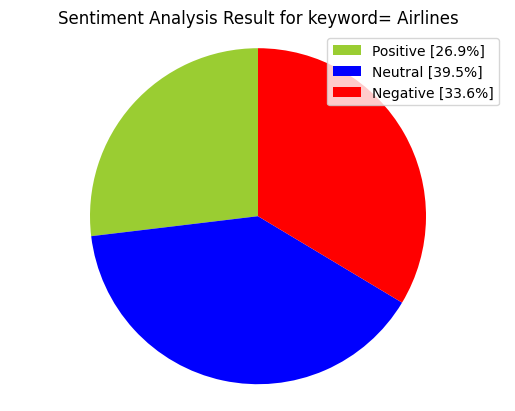

In [27]:
#Creating PieChart
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword= "+"Airlines"+"")
plt.axis('equal')
plt.show()

In [28]:
# tweet_list contains all tweets of positive, negative and neutral sentiments
tweet_list

,0
0,RT @MakisMD: American Airlines Flight Attendan...
1,@joiedevivre789 Transit travels are better thr...
2,Aeromexico Flight Change policy\n\nIf you want...
3,United Airlines flight #UAL1597 spotted at 775...
4,"United Airlines flight #UAL1813 spotted at 29,..."
...,...
10718,RT @OnDisasters: #Ongoing a Halla Airlines EMB...
10719,Southwest Airlines flight #SWA818 spotted at 1...
10720,RT @OnDisasters: #Ongoing a Halla Airlines EMB...
10721,RT @Mikedknight: This woman deserves to be nat...


In [ ]:
positive_list

,0
0,@joiedevivre789 Transit travels are better thr...
1,Aeromexico Flight Change policy\n\nIf you want...
2,United Airlines flight #UAL1597 spotted at 775...
3,"United Airlines flight #UAL1813 spotted at 29,..."
4,RT @HateDetectors: Sana had Love marriage with...
...,...
2876,@Caithlin_mully Oh my. If any of my guitars we...
2877,RT @OnDisasters: #Ongoing a Halla Airlines EMB...
2878,RT @OnDisasters: #Ongoing a Halla Airlines EMB...
2879,RT @Mikedknight: This woman deserves to be nat...


Sentiments Analysis: Cleaning Tweets and using cleaned tweets for calculating sentiment

In [29]:
# Dropping duplicated tweets
tweet_list.drop_duplicates(inplace = True)

In [30]:
tweet_list # After removing duplicated tweets there are 2558 tweets (10723 - 2558 = 8165 duplicated tweets are removed)

,0
0,RT @MakisMD: American Airlines Flight Attendan...
1,@joiedevivre789 Transit travels are better thr...
2,Aeromexico Flight Change policy\n\nIf you want...
3,United Airlines flight #UAL1597 spotted at 775...
4,"United Airlines flight #UAL1813 spotted at 29,..."
...,...
10711,Flair Airlines #984/C-GCJL arrived at Halifax ...
10712,China Airlines\nCI120 CAL120\nfrom TPE to OKA\...
10715,I WAS FLYING WORKING A TRIP FOR UNITED AIRLINE...
10716,@Caithlin_mully Oh my. If any of my guitars we...


In [31]:
# 2. Create new data frame (tw_list) and a new feature(text) containing tweets, then cleaning the text
#Cleaning Text: clean text by using lambda function and clean RT, link, punctuation, characters and finally convert to lowercase.
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

In [32]:
tw_list["text"]

0        RT @MakisMD: American Airlines Flight Attendan...
1        @joiedevivre789 Transit travels are better thr...
2        Aeromexico Flight Change policy\n\nIf you want...
3        United Airlines flight #UAL1597 spotted at 775...
4        United Airlines flight #UAL1813 spotted at 29,...
                               ...                        
10711    Flair Airlines #984/C-GCJL arrived at Halifax ...
10712    China Airlines\nCI120 CAL120\nfrom TPE to OKA\...
10715    I WAS FLYING WORKING A TRIP FOR UNITED AIRLINE...
10716    @Caithlin_mully Oh my. If any of my guitars we...
10719    Southwest Airlines flight #SWA818 spotted at 1...
Name: text, Length: 2558, dtype: object

In [33]:
# Creating a function for cleaning the tweets. It will clean RT, link, punctuation, characters and finally convert to lowercase.
def clean_tweet(tweet):
    return ' '.join(re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|([RT])', ' ', str(tweet).lower()).split())

In [34]:
# Call function to get Clean tweets
tw_list['text'] = tw_list[0].apply(lambda x : clean_tweet(x))
tw_list.text.head(10)

0    rt american airlines flight attendant carol wr...
1    transit travels are better through emirates di...
2    aeromexico flight change policy if you want to...
3    united airlines flight ual1597 spotted at 775 ...
4    united airlines flight ual1813 spotted at 29 8...
5    rt during the pandemic we bailed the airlines ...
6    rt sana had love marriage with schoolmate hema...
7    i never wear any pants on a plane banned from ...
8    delta airlines flight dal542 spotted at 13 350...
9    rt so billionaires were on a submarine without...
Name: text, dtype: object

In [35]:
#Calculating polarity, subjectivity using TextBlob
# Subjectivity quantifies the amount of personal opinion and factual information contained in the text.Higher subjectivity indicates that text contains personal opinion rather than factual information.
tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))


In [36]:
tw_list

,0,text,polarity,subjectivity
0,RT @MakisMD: American Airlines Flight Attendan...,rt american airlines flight attendant carol wr...,0.066667,0.233333
1,@joiedevivre789 Transit travels are better thr...,transit travels are better through emirates di...,0.500000,0.500000
2,Aeromexico Flight Change policy\n\nIf you want...,aeromexico flight change policy if you want to...,0.000000,0.000000
3,United Airlines flight #UAL1597 spotted at 775...,united airlines flight ual1597 spotted at 775 ...,0.000000,0.000000
4,"United Airlines flight #UAL1813 spotted at 29,...",united airlines flight ual1813 spotted at 29 8...,0.000000,0.000000
...,...,...,...,...
10711,Flair Airlines #984/C-GCJL arrived at Halifax ...,flair airlines 984 c gcjl arrived at halifax i...,0.000000,0.000000
10712,China Airlines\nCI120 CAL120\nfrom TPE to OKA\...,china airlines ci120 cal120 from tpe to oka a3...,0.000000,0.000000
10715,I WAS FLYING WORKING A TRIP FOR UNITED AIRLINE...,i was flying working a trip for united airline...,0.000000,0.000000
10716,@Caithlin_mully Oh my. If any of my guitars we...,mully oh my if any of my guitars were messed u...,0.000000,0.000000


In [37]:
# Calculating sentiment based on higher positive score or negative score
for index, row in tw_list['text'].iteritems():
  score = SentimentIntensityAnalyzer().polarity_scores(row)
  neg = score['neg']
  neu = score['neu']
  pos = score['pos']
  comp = score['compound']
  if neg > pos:
    tw_list.loc[index, 'sentiment'] = "negative"
  elif pos > neg:
    tw_list.loc[index, 'sentiment'] = "positive"
  else:
    tw_list.loc[index, 'sentiment'] = "neutral"

  tw_list.loc[index, 'neg'] = neg
  tw_list.loc[index, 'neu'] = neu
  tw_list.loc[index, 'pos'] = pos
  tw_list.loc[index, 'compound'] = comp


<ipython-input-37-d13f99c6d4f1>:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, row in tw_list['text'].iteritems():


In [38]:
tw_list

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @MakisMD: American Airlines Flight Attendan...,rt american airlines flight attendant carol wr...,0.066667,0.233333,negative,0.091,0.909,0.000,-0.2732
1,@joiedevivre789 Transit travels are better thr...,transit travels are better through emirates di...,0.500000,0.500000,positive,0.000,0.818,0.182,0.4404
2,Aeromexico Flight Change policy\n\nIf you want...,aeromexico flight change policy if you want to...,0.000000,0.000000,positive,0.000,0.933,0.067,0.0772
3,United Airlines flight #UAL1597 spotted at 775...,united airlines flight ual1597 spotted at 775 ...,0.000000,0.000000,positive,0.000,0.714,0.286,0.4215
4,"United Airlines flight #UAL1813 spotted at 29,...",united airlines flight ual1813 spotted at 29 8...,0.000000,0.000000,positive,0.000,0.741,0.259,0.4215
...,...,...,...,...,...,...,...,...,...
10711,Flair Airlines #984/C-GCJL arrived at Halifax ...,flair airlines 984 c gcjl arrived at halifax i...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
10712,China Airlines\nCI120 CAL120\nfrom TPE to OKA\...,china airlines ci120 cal120 from tpe to oka a3...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
10715,I WAS FLYING WORKING A TRIP FOR UNITED AIRLINE...,i was flying working a trip for united airline...,0.000000,0.000000,positive,0.000,0.714,0.286,0.6808
10716,@Caithlin_mully Oh my. If any of my guitars we...,mully oh my if any of my guitars were messed u...,0.000000,0.000000,positive,0.100,0.795,0.105,0.0258


In [43]:
#Creating new data frames for all sentiments (positive, negative and neutral)
tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [48]:
len(tw_list_negative)

515

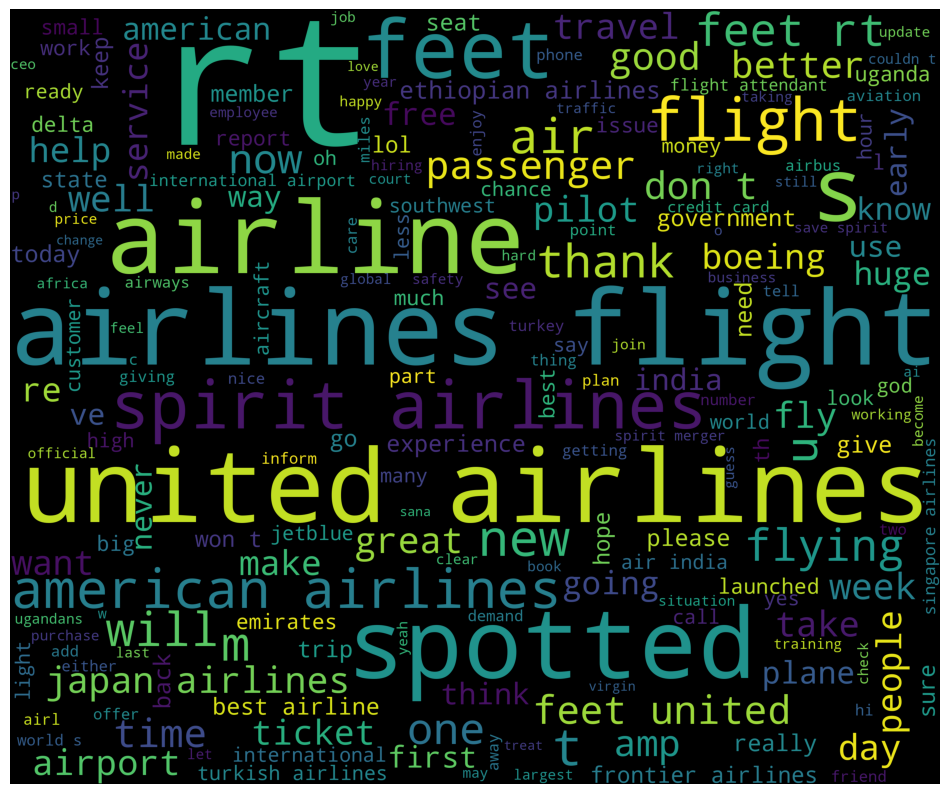

In [49]:
# Wordcloud for tweets with positive sentiments
from wordcloud import WordCloud,STOPWORDS

new_df=tw_list[tw_list['sentiment']=='positive']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('WordCloudWithPositiveSentimentAnalysis.png', bbox_inches = 'tight')
plt.show()

In [ ]:
wordcloud.to_file("wc_pos_with_sentiment_analysis.png")

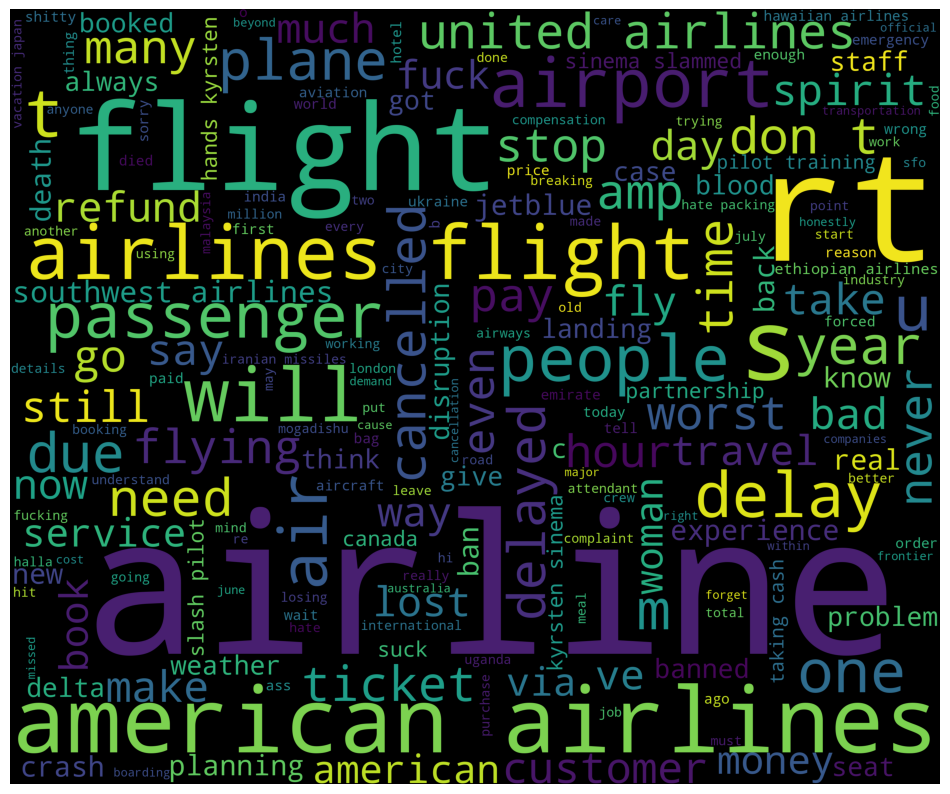

In [50]:
# Wordcloud for tweets with negative sentiments
new_df=tw_list[tw_list['sentiment']=='negative']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('WordCloudWithNegativeSentimentAnalysis.png', bbox_inches = 'tight')
plt.show()


In [ ]:
wordcloud.to_file("wc_neg_with_sentiment_analysis.png")

In [51]:
# Renaming the columns in tw_list dataframe
dict = { 0: 'text', 'text': 'textCleaned'}
tw_list.rename(columns=dict, inplace=True)

In [52]:
tw_list

,text,textCleaned,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @MakisMD: American Airlines Flight Attendan...,rt american airlines flight attendant carol wr...,0.066667,0.233333,negative,0.091,0.909,0.000,-0.2732
1,@joiedevivre789 Transit travels are better thr...,transit travels are better through emirates di...,0.500000,0.500000,positive,0.000,0.818,0.182,0.4404
2,Aeromexico Flight Change policy\n\nIf you want...,aeromexico flight change policy if you want to...,0.000000,0.000000,positive,0.000,0.933,0.067,0.0772
3,United Airlines flight #UAL1597 spotted at 775...,united airlines flight ual1597 spotted at 775 ...,0.000000,0.000000,positive,0.000,0.714,0.286,0.4215
4,"United Airlines flight #UAL1813 spotted at 29,...",united airlines flight ual1813 spotted at 29 8...,0.000000,0.000000,positive,0.000,0.741,0.259,0.4215
...,...,...,...,...,...,...,...,...,...
10711,Flair Airlines #984/C-GCJL arrived at Halifax ...,flair airlines 984 c gcjl arrived at halifax i...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
10712,China Airlines\nCI120 CAL120\nfrom TPE to OKA\...,china airlines ci120 cal120 from tpe to oka a3...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
10715,I WAS FLYING WORKING A TRIP FOR UNITED AIRLINE...,i was flying working a trip for united airline...,0.000000,0.000000,positive,0.000,0.714,0.286,0.6808
10716,@Caithlin_mully Oh my. If any of my guitars we...,mully oh my if any of my guitars were messed u...,0.000000,0.000000,positive,0.100,0.795,0.105,0.0258


In [54]:
# Merging tw_list dataset containing all scores: pos,neg,neutral,polarity and subjectivity, with original dataframe (original dataframe contains all twitter user columns)
df_new = df.merge(tw_list, on = 'text')

In [55]:
df_new

,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,...,quoted_status,withheld_in_countries,textCleaned,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,2023-06-24 05:43:22+00:00,1672480513741713408,1672480513741713408,RT @MakisMD: American Airlines Flight Attendan...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,NaN,NaN,rt american airlines flight attendant carol wr...,0.066667,0.233333,negative,0.091,0.909,0.000,-0.2732
1,2023-06-24 05:38:18+00:00,1672479238681681920,1672479238681681920,RT @MakisMD: American Airlines Flight Attendan...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,NaN,NaN,rt american airlines flight attendant carol wr...,0.066667,0.233333,negative,0.091,0.909,0.000,-0.2732
2,2023-06-24 05:35:55+00:00,1672478641547010051,1672478641547010048,RT @MakisMD: American Airlines Flight Attendan...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,NaN,NaN,rt american airlines flight attendant carol wr...,0.066667,0.233333,negative,0.091,0.909,0.000,-0.2732
3,2023-06-24 05:34:08+00:00,1672478189980127232,1672478189980127232,RT @MakisMD: American Airlines Flight Attendan...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,NaN,NaN,rt american airlines flight attendant carol wr...,0.066667,0.233333,negative,0.091,0.909,0.000,-0.2732
4,2023-06-24 05:28:42+00:00,1672476822393720834,1672476822393720832,RT @MakisMD: American Airlines Flight Attendan...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,NaN,NaN,rt american airlines flight attendant carol wr...,0.066667,0.233333,negative,0.091,0.909,0.000,-0.2732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10718,2023-07-12 00:50:42+00:00,1678929846158622720,1678929846158622720,Flair Airlines #984/C-GCJL arrived at Halifax ...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://flightaware.com/"" rel=""nofollo...",NaN,NaN,...,NaN,NaN,flair airlines 984 c gcjl arrived at halifax i...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
10719,2023-07-12 00:50:30+00:00,1678929795432976385,1678929795432976384,China Airlines\nCI120 CAL120\nfrom TPE to OKA\...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,NaN,NaN,china airlines ci120 cal120 from tpe to oka a3...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
10720,2023-07-12 00:50:10+00:00,1678929710208671747,1678929710208671744,I WAS FLYING WORKING A TRIP FOR UNITED AIRLINE...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,NaN,NaN,i was flying working a trip for united airline...,0.000000,0.000000,positive,0.000,0.714,0.286,0.6808
10721,2023-07-12 00:50:03+00:00,1678929681339281408,1678929681339281408,@Caithlin_mully Oh my. If any of my guitars we...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.678883e+18,1.678883e+18,...,NaN,NaN,mully oh my if any of my guitars were messed u...,0.000000,0.000000,positive,0.100,0.795,0.105,0.0258


In [56]:
# Removing duplicates based on text
df_new.drop_duplicates(subset='text', inplace=True)

In [57]:
df_new # The number of samples is exactly equal to the number of samples in tw_list after polarity and subjectivity

,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,...,quoted_status,withheld_in_countries,textCleaned,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,2023-06-24 05:43:22+00:00,1672480513741713408,1672480513741713408,RT @MakisMD: American Airlines Flight Attendan...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,NaN,NaN,rt american airlines flight attendant carol wr...,0.066667,0.233333,negative,0.091,0.909,0.000,-0.2732
91,2023-06-24 05:43:12+00:00,1672480471866023938,1672480471866023936,@joiedevivre789 Transit travels are better thr...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.672480e+18,1.672480e+18,...,NaN,NaN,transit travels are better through emirates di...,0.500000,0.500000,positive,0.000,0.818,0.182,0.4404
94,2023-06-24 05:43:07+00:00,1672480451582124034,1672480451582124032,Aeromexico Flight Change policy\n\nIf you want...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,NaN,NaN,aeromexico flight change policy if you want to...,0.000000,0.000000,positive,0.000,0.933,0.067,0.0772
97,2023-06-24 05:42:56+00:00,1672480403553411073,1672480403553411072,United Airlines flight #UAL1597 spotted at 775...,False,"{'hashtags': [{'text': 'UAL1597', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://null.kiwi.net/"" rel=""nofollow""...",NaN,NaN,...,NaN,NaN,united airlines flight ual1597 spotted at 775 ...,0.000000,0.000000,positive,0.000,0.714,0.286,0.4215
100,2023-06-24 05:42:26+00:00,1672480280580603904,1672480280580603904,"United Airlines flight #UAL1813 spotted at 29,...",False,"{'hashtags': [{'text': 'UAL1813', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://null.kiwi.net/"" rel=""nofollow""...",NaN,NaN,...,NaN,NaN,united airlines flight ual1813 spotted at 29 8...,0.000000,0.000000,positive,0.000,0.741,0.259,0.4215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10718,2023-07-12 00:50:42+00:00,1678929846158622720,1678929846158622720,Flair Airlines #984/C-GCJL arrived at Halifax ...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://flightaware.com/"" rel=""nofollo...",NaN,NaN,...,NaN,NaN,flair airlines 984 c gcjl arrived at halifax i...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
10719,2023-07-12 00:50:30+00:00,1678929795432976385,1678929795432976384,China Airlines\nCI120 CAL120\nfrom TPE to OKA\...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,NaN,NaN,china airlines ci120 cal120 from tpe to oka a3...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
10720,2023-07-12 00:50:10+00:00,1678929710208671747,1678929710208671744,I WAS FLYING WORKING A TRIP FOR UNITED AIRLINE...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,NaN,NaN,i was flying working a trip for united airline...,0.000000,0.000000,positive,0.000,0.714,0.286,0.6808
10721,2023-07-12 00:50:03+00:00,1678929681339281408,1678929681339281408,@Caithlin_mully Oh my. If any of my guitars we...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.678883e+18,1.678883e+18,...,NaN,NaN,mully oh my if any of my guitars were messed u...,0.000000,0.000000,positive,0.100,0.795,0.105,0.025

In [58]:
df_new.columns

Index(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities',
       'metadata', 'source', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'retweeted_status',
       'is_quote_status', 'quoted_status_id', 'quoted_status_id_str',
       'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'lang',
       'possibly_sensitive', 'extended_entities', 'quoted_status',
       'withheld_in_countries', 'textCleaned', 'polarity', 'subjectivity',
       'sentiment', 'neg', 'neu', 'pos', 'compound'],
      dtype='object')

In [59]:
df_new['user'][0]
# The user column contains a lot of information about the user.

{'id': 1926562094,
 'id_str': '1926562094',
 'name': 'PaddyNenagh',
 'screen_name': 'PaddyNenagh',
 'location': 'Stornoway, Scotland',
 'description': 'Retired Uni Tutor (History). Huge fan of Luke Kelly (The Dubliners) & Iris Dement. RTs not necessarily endorsements. Kindness is the mightiest force..',
 'url': None,
 'entities': {'description': {'urls': []}},
 'protected': False,
 'followers_count': 1919,
 'friends_count': 3717,
 'listed_count': 116,
 'created_at': 'Wed Oct 02 11:18:51 +0000 2013',
 'favourites_count': 146812,
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': True,
 'verified': False,
 'statuses_count': 311880,
 'lang': None,
 'contributors_enabled': False,
 'is_translator': False,
 'is_translation_enabled': False,
 'profile_background_color': 'C0DEED',
 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png',
 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png',
 'profile_background_tile': False,

In [60]:
# Extracting the user variables from column user
df_new['usr_name'] = df_new['user'].apply(lambda x: x.get('name'))
df_new['foll_count'] = df_new['user'].apply(lambda x: x.get('followers_count'))
df_new['friends_count'] = df_new['user'].apply(lambda x: x.get('friends_count'))
df_new['fav_count'] = df_new['user'].apply(lambda x: x.get('favourites_count'))
df_new['status_count'] = df_new['user'].apply(lambda x: x.get('statuses_count'))
#The number of public lists that this user is a member of.
df_new['listed_count'] = df_new['user'].apply(lambda x: x.get('listed_count'))
# screen name of each user
df_new['screen_name'] = df_new['user'].apply(lambda x: x.get('screen_name'))

In [61]:
df_new.columns

Index(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities',
       'metadata', 'source', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'retweeted_status',
       'is_quote_status', 'quoted_status_id', 'quoted_status_id_str',
       'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'lang',
       'possibly_sensitive', 'extended_entities', 'quoted_status',
       'withheld_in_countries', 'textCleaned', 'polarity', 'subjectivity',
       'sentiment', 'neg', 'neu', 'pos', 'compound', 'usr_name', 'foll_count',
       'friends_count', 'fav_count', 'status_count', 'listed_count',
       'screen_name'],
      dtype='object')

In [62]:
df_new.to_csv("TwitterDataPrep6.csv")